In [85]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [35]:
def wrangle(path):
    df=pd.read_csv(path)
    df.dropna(inplace=True)

    df['Satisfaction']=df['Satisfaction'].replace('Neutral or Dissatisfied',0)
    df['Satisfaction']=df['Satisfaction'].replace('Satisfied',1)
    df['Satisfaction']

    df['Satisfaction']=df['Satisfaction'].astype(int)
    columns=[]
    columns.append("ID")
    #mulitylinearty
    columns.append("Arrival Delay")
    columns.append("In-flight Wifi Service")
    columns.append("In-flight Entertainment")
    columns.append("Seat Comfort")
    columns.append("Food and Drink")
    df.drop(columns=columns,inplace=True)

    
    return df

In [4]:
df=wrangle('./airline_passenger_satisfaction.csv')
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Leg Room Service,Cleanliness,In-flight Service,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,3,3,4,3,3,3,2,5,5,5,0
1,Female,35,Returning,Business,Business,821,26,2,2,3,5,2,5,5,5,5,5,1
2,Male,41,Returning,Business,Business,853,0,4,4,4,5,4,3,3,5,3,3,1
3,Male,50,Returning,Business,Business,1905,0,2,2,3,4,2,5,5,4,5,5,1
4,Female,49,Returning,Business,Business,3470,0,3,3,3,5,3,3,4,5,3,3,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 18 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   Gender                                  129487 non-null  object
 1   Age                                     129487 non-null  int64 
 2   Customer Type                           129487 non-null  object
 3   Type of Travel                          129487 non-null  object
 4   Class                                   129487 non-null  object
 5   Flight Distance                         129487 non-null  int64 
 6   Departure Delay                         129487 non-null  int64 
 7   Departure and Arrival Time Convenience  129487 non-null  int64 
 8   Ease of Online Booking                  129487 non-null  int64 
 9   Check-in Service                        129487 non-null  int64 
 10  Online Boarding                         129487 non-null 

In [6]:
(df.isnull().sum()/len(df))*100

Gender                                    0.0
Age                                       0.0
Customer Type                             0.0
Type of Travel                            0.0
Class                                     0.0
Flight Distance                           0.0
Departure Delay                           0.0
Departure and Arrival Time Convenience    0.0
Ease of Online Booking                    0.0
Check-in Service                          0.0
Online Boarding                           0.0
Gate Location                             0.0
On-board Service                          0.0
Leg Room Service                          0.0
Cleanliness                               0.0
In-flight Service                         0.0
Baggage Handling                          0.0
Satisfaction                              0.0
dtype: float64

In [7]:
df['Satisfaction'].unique()

array([0, 1])

In [8]:
df.describe()

,Age,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Leg Room Service,Cleanliness,In-flight Service,Baggage Handling,Satisfaction
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1190.210662,14.643385,3.057349,2.756786,3.306239,3.252720,2.976909,3.383204,3.351078,3.286222,3.642373,3.631886,0.434499
std,15.117597,997.560954,37.932867,1.526787,1.401662,1.266146,1.350651,1.278506,1.287032,1.316132,1.313624,1.176614,1.180082,0.495693
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,414.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,0.000000
50%,40.000000,844.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000
75%,51.000000,1744.000000,12.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,1.000000
max,85.000000,4983.000000,1592.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [9]:
df['Satisfaction'].value_counts(normalize=True)

0    0.565501
1    0.434499
Name: Satisfaction, dtype: float64

In [10]:
#check cardinality
df.select_dtypes("object").nunique()

Gender            2
Customer Type     2
Type of Travel    2
Class             3
dtype: int64

In [11]:
df.select_dtypes("number").corr()

,Age,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Leg Room Service,Cleanliness,In-flight Service,Baggage Handling,Satisfaction
Age,1.000000,0.099863,-0.009263,0.036780,0.022294,0.033182,0.207485,-0.000709,0.056743,0.038992,0.052575,-0.051778,-0.048192,0.134001
Flight Distance,0.099863,1.000000,0.001992,-0.018901,0.064959,0.073635,0.215082,0.005378,0.111224,0.134548,0.095658,0.059182,0.064810,0.298206
Departure Delay,-0.009263,0.001992,1.000000,0.000610,-0.005330,-0.018632,-0.019319,0.005943,-0.030471,0.014339,-0.014553,-0.054329,-0.004425,-0.051032
Departure and Arrival Time Convenience,0.036780,-0.018901,0.000610,1.000000,0.437697,0.091217,0.072175,0.447411,0.067046,0.010634,0.010021,0.072166,0.070646,-0.054457
Ease of Online Booking,0.022294,0.064959,-0.005330,0.437697,1.000000,0.008835,0.404944,0.460155,0.039039,0.109341,0.015150,0.035356,0.039215,0.168704
Check-in Service,0.033182,0.073635,-0.018632,0.091217,0.008835,1.000000,0.204215,-0.039294,0.244620,0.152715,0.176611,0.237737,0.234732,0.237146
Online Boarding,0.207485,0.215082,-0.019319,0.072175,0.404944,0.204215,1.000000,0.002579,0.154272,0.123149,0.329331,0.073973,0.083563,0.501620
Gate Location,-0.000709,0.005378,0.005943,0.447411,0.460155,-0.039294,0.002579,1.000000,-0.029109,-0.005146,-0.006066,0.000337,0.001097,-0.002923
On-board Service,0.056743,0.111224,-0.030471,0.067046,0.039039,0.244620,0.154272,-0.029109,1.000000,0.357877,0.122208,0.551460,0.520400,0.322329
Leg Room Service,0.038992,0.134548,0.014339,0.010634,0.109341,0.152715,0.123149,-0.005146,0.357877,1.000000,0.096777,0.369833,0.371599,0.312557


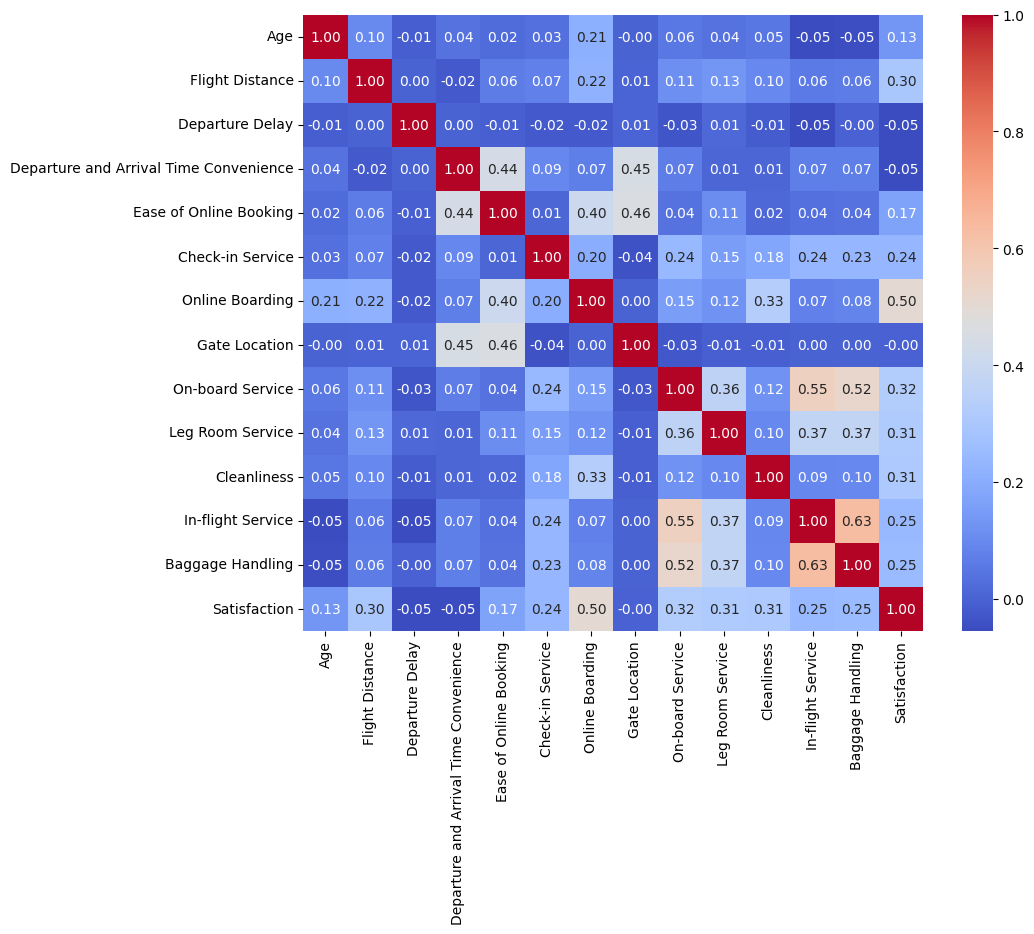

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes("number").corr(),annot=True,cmap='coolwarm',fmt='.2f');

# Univarte

<AxesSubplot: xlabel='Age', ylabel='Count'>

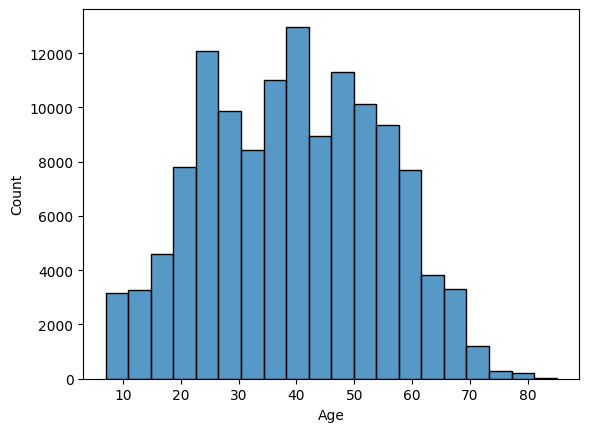

In [13]:
sns.histplot(df['Age'],bins=20)


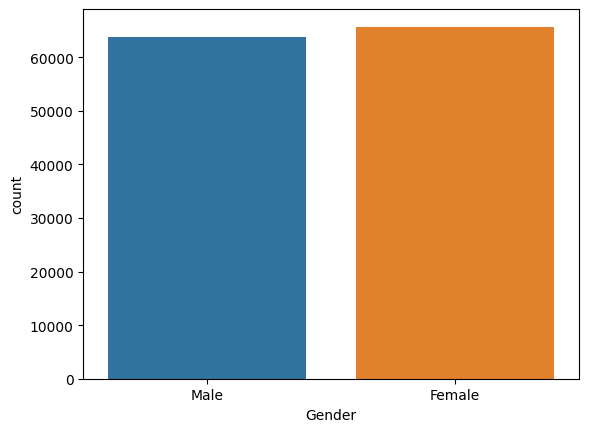

In [14]:
sns.countplot(x='Gender',data=df);

In [17]:
target = "Satisfaction"
x=df.drop(columns=target)
y=df[target]

In [29]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
accuracy=y_train.value_counts(normalize=True).max()
accuracy

0.5651179179256485

In [75]:
model=make_pipeline(
 OneHotEncoder(use_cat_names=True),
 LogisticRegression(max_iter=1000)   
)
model.fit(X_train,y_train)

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Gender', 'Customer Type',
                                     'Type of Travel', 'Class'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [76]:
y_pred=model.predict(X_test)

In [77]:
result = pd.DataFrame({'y_pre':y_pred,'y_test':y_test})
result.head()

,y_pre,y_test
98181,0,0
24977,0,0
69262,0,1
90494,1,1
36203,1,1


In [78]:
accuracy = accuracy_score(y_test,y_pred)
print("The Accuracy = ",accuracy*100,'%')

The Accuracy =  86.65147887867789 %


In [79]:
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.868518,0.863653,0.866515,0.866086,0.866412
recall,0.900987,0.821368,0.866515,0.861178,0.866515
f1-score,0.884455,0.841980,0.866515,0.863217,0.866065
support,14685.000000,11213.000000,0.866515,25898.000000,25898.000000


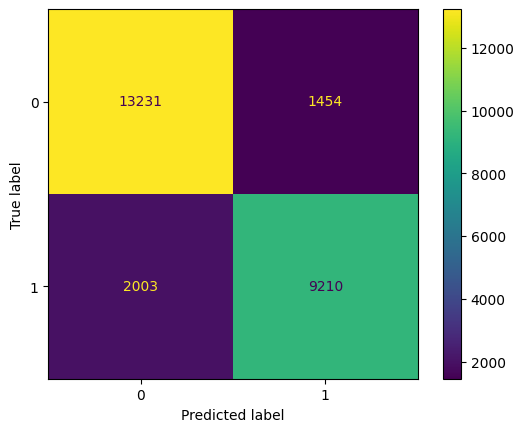

In [81]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [66]:
parans={"decisiontreeclassifier__max_depth":range(5,100,10)}

In [67]:
model_tree= make_pipeline(OneHotEncoder(),DecisionTreeClassifier())
model_tree.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Gender', 'Customer Type',
                                     'Type of Travel', 'Class'])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [68]:
model_two=GridSearchCV(model_tree,param_grid=parans,cv=5,n_jobs=-1,verbose=1)

In [69]:
model_two.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(cols=['Gender',
                                                            'Customer Type',
                                                            'Type of Travel',
                                                            'Class'])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': range(5, 100, 10)},
             verbose=1)

In [70]:
model_two.best_params_

{'decisiontreeclassifier__max_depth': 15}

In [114]:
model_tree= make_pipeline(OneHotEncoder(use_cat_names=True),DecisionTreeClassifier(max_depth=10))
model_tree.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Gender', 'Customer Type',
                                     'Type of Travel', 'Class'],
                               use_cat_names=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=10))])

In [115]:
accuracy= accuracy_score(y_test,model_tree.predict(X_test))
accuracy

0.9219630859525833

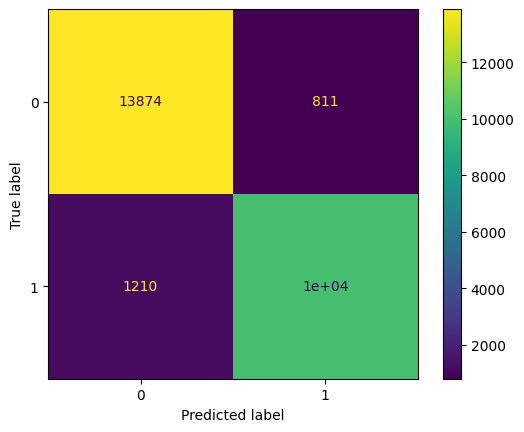

In [116]:
ConfusionMatrixDisplay.from_estimator(model_tree,X_test,y_test)

In [117]:
pd.DataFrame(classification_report(y_test,model_tree.predict(X_test),output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.919783,0.925005,0.921963,0.922394,0.922044
recall,0.944774,0.892090,0.921963,0.918432,0.921963
f1-score,0.932111,0.908249,0.921963,0.920180,0.921779
support,14685.000000,11213.000000,0.921963,25898.000000,25898.000000


In [118]:
clf=make_pipeline(OneHotEncoder(use_cat_names=True),RandomForestClassifier(random_state=42))

In [119]:
params={"randomforestclassifier__n_estimators":range(25,100,25),"randomforestclassifier__max_depth":range(5,100,10)}

In [120]:
model_three=GridSearchCV(clf,param_grid=params,cv=5,n_jobs=-1,verbose=1)

In [121]:
model_three.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(use_cat_names=True)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(5, 100, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

In [122]:
model_three.best_params_

{'randomforestclassifier__max_depth': 45,
 'randomforestclassifier__n_estimators': 75}

In [123]:
model_re=make_pipeline(OneHotEncoder(use_cat_names=True),RandomForestClassifier(random_state=42,max_depth=45,n_estimators=75))
model_re.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Gender', 'Customer Type',
                                     'Type of Travel', 'Class'],
                               use_cat_names=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=45, n_estimators=75,
                                        random_state=42))])

In [124]:
acc=accuracy_score(y_test,model_re.predict(X_test))
acc

0.9350915128581357

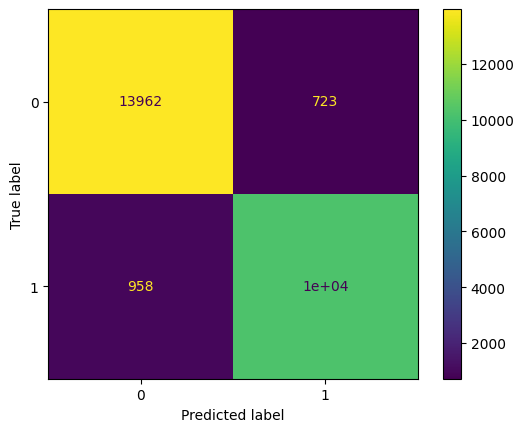

In [125]:
ConfusionMatrixDisplay.from_estimator(model_re,X_test,y_test)

In [126]:
pd.DataFrame(classification_report(y_test,model_re.predict(X_test),output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.935791,0.934141,0.935092,0.934966,0.935077
recall,0.950766,0.914563,0.935092,0.932665,0.935092
f1-score,0.943219,0.924249,0.935092,0.933734,0.935005
support,14685.000000,11213.000000,0.935092,25898.000000,25898.000000
